In [25]:
# importing the libraries
import os
from tensorflow.keras.models import Sequential
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense , Conv2D, Flatten, MaxPooling2D

In [26]:
def data_loader(path_train, path_test):
  train_list=os.listdir(path_train)
  num_classes=len(train_list)
  x_train=[]
  y_train=[]
  x_test=[]
  y_test=[]
  for label, folder in enumerate(train_list):
    path1 = path_train+'/'+str(folder)
    images = os.listdir(path1)
    for file in images:
      path2 = path1+'/'+str(file)

      # Read the image form the directory
      img = cv2.imread(path2)
      # Append image to the train data list
      x_train.append(img)

      # Append class-label corresponding to the image
      y_train.append(label)

    # Loading testing data
    path1 = path_test+'/'+str(folder)
    images = os.listdir(path1)
    for file in images:
      path2=path1+'/'+str(file)

      # Read the image form the directory
      img = cv2.imread(path2)
      # Append image to the test data list
      x_test.append(img)

      # Append class-label corresponding to the image
      y_test.append(label)
  # Convert lists into numpy arrays
  x_train=np.asarray(x_train)
  y_train=np.asarray(y_train)
  x_test=np.asarray(x_test)
  y_test=np.asarray(y_test)
  return x_train,y_train,x_test,y_test


In [27]:

path_train = 'Data/train'
path_test = 'Data/test'
x_train,y_train,x_test,y_test = data_loader(path_train=path_train,path_test=path_test)

In [28]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train_split,x_valid_split,y_train_split,y_valid_split =  train_test_split(
    x_train, y_train, test_size=0.10, random_state=42)

In [29]:
print(x_train_split.shape)
print(x_valid_split.shape)
print(y_train_split.shape)
print(y_valid_split.shape)

(1350, 32, 32, 3)
(150, 32, 32, 3)
(1350, 3)
(150, 3)


In [30]:
# normalizing 
x_valid_split = x_valid_split/255
x_train_split = x_train_split/255
print(np.array(x_train_split).shape)
print(np.array(x_valid_split).shape)
sh = np.array(x_train_split).shape

(1350, 32, 32, 3)
(150, 32, 32, 3)


In [31]:
model = Sequential()
model.add(Conv2D(64, (3,3), strides = (1,1), padding = 'same' , input_shape = (sh[1],sh[2],sh[3]), activation='relu'))
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding = 'same', activation = 'relu'))    
model.add(MaxPooling2D((2, 2), strides=(2, 2), padding = 'valid'))
model.add(Conv2D(128, (3, 3), strides=(1, 1), padding = 'same', activation = 'relu'))    
model.add(Conv2D(128, (3, 3), strides=(1, 1), padding = 'same', activation = 'relu'))   
model.add(MaxPooling2D((2, 2), strides=(2, 2), padding = 'valid'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                 

Epoch 1/50
7/7 [==============================] - 16s 2s/step - loss: 1.1010 - acc: 0.3415 - val_loss: 1.0473 - val_acc: 0.3533
Epoch 2/50
7/7 [==============================] - 13s 2s/step - loss: 0.9466 - acc: 0.5207 - val_loss: 0.8758 - val_acc: 0.6533
Epoch 3/50
7/7 [==============================] - 10s 1s/step - loss: 0.8056 - acc: 0.6741 - val_loss: 0.9355 - val_acc: 0.6400
Epoch 4/50
7/7 [==============================] - 12s 2s/step - loss: 0.7124 - acc: 0.7156 - val_loss: 0.7444 - val_acc: 0.6867
Epoch 5/50
7/7 [==============================] - 12s 2s/step - loss: 0.6902 - acc: 0.7119 - val_loss: 0.6969 - val_acc: 0.7000
Epoch 6/50
7/7 [==============================] - 11s 2s/step - loss: 0.6371 - acc: 0.7356 - val_loss: 0.6677 - val_acc: 0.7200
Epoch 7/50
7/7 [==============================] - 11s 2s/step - loss: 0.5470 - acc: 0.7733 - val_loss: 0.6222 - val_acc: 0.7200
Epoch 8/50
7/7 [==============================] - 11s 2s/step - loss: 0.4796 - acc: 0.8081 - val_loss: 0

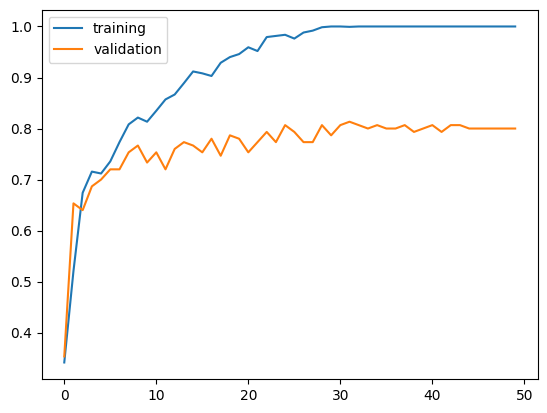

In [33]:
import h5py
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(x_train_split, y_train_split, validation_data=(x_valid_split, y_valid_split), epochs=50, batch_size=200)
model.save_weights('CNN.h5')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [34]:
x_test = x_test/255
print(x_test.shape)
print(y_test.shape)

(300, 32, 32, 3)
(300, 3)


In [41]:
scores = model.evaluate(x_test, y_test)
predictions = model.predict(x_test)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

10/10 [==============================] - 0s 40ms/step - loss: 1.2698 - acc: 0.8333
Baseline Error: 16.67%
